In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('march-machine-learning-mania-2023/seasonStats.csv')
df = df.iloc[1:]
df = df[df['Season'] == 2015] 
df = df[df['GamesWon'] > 0] 
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 13 to 7447
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  349 non-null    int64  
 1   Season      349 non-null    int64  
 2   TeamID      349 non-null    int64  
 3   GamesWon    349 non-null    int64  
 4   HighDay     349 non-null    int64  
 5   AVGFGM      349 non-null    float64
 6   AVGFGA      349 non-null    float64
 7   AVGFGM3     349 non-null    float64
 8   AVGFGA3     349 non-null    float64
 9   AVGFTM      349 non-null    float64
 10  AVGFTA      349 non-null    float64
 11  AVGOR       349 non-null    float64
 12  AVGDR       349 non-null    float64
 13  AVGAst      349 non-null    float64
 14  AVGTO       349 non-null    float64
 15  AVGStl      349 non-null    float64
 16  AVGBlk      349 non-null    float64
 17  AVGPF       349 non-null    float64
 18  OAVGFGM     349 non-null    float64
 19  OAVGFGA     349 non-null   

Unnamed: 0  Season  TeamID  GamesWon  HighDay     AVGFGM     AVGFGA  \
13           13    2015    1104        17       -1  22.032258  50.258065   
34           34    2015    1272        18       -1  25.062500  57.093750   
55           55    2015    1266        13       -1  23.187500  53.093750   
76           76    2015    1296        13       -1  21.827586  51.206897   
97           97    2015    1400        20        1  23.606061  54.151515   
118         118    2015    1458        31        6  25.294118  52.735294   
139         139    2015    1161        26       -1  24.343750  55.468750   
160         160    2015    1186        23        1  27.290323  58.290323   
181         181    2015    1194         7       -1  22.518519  54.185185   
202         202    2015    1166        14       -1  22.606061  53.818182   

      AVGFGM3    AVGFGA3     AVGFTM  ...   OAVGFGA3    OAVGFTM    OAVGFTA  \
13   6.580645  20.483871  16.000000  ...  19.387097  14.806452  20.838710   
34   5.187500  15.812500  12.031250  ...  16.875000  14.593750  21.156250   
55   6.468750  18.812500  12.250000  ...  20.312500  12.093750  16.937500   
76   5.068966  15.724138  16.275862  ...  21.862069  14.413793  20.620690   
97   6.242424  18.393939  14.484848  ...  17.424242  12.757576  19.303030   
118  6.970588  19.500000  14.323529  ...  13.882353   7.470588  10.970588   
139  7.156250  20.343750  15.718750  ...  18.781250  11.656250  17.937500   
160  9.967742  25.161290  14.806452  ...  20.096774  14.483871  20.225806   
181  7.222222  20.666667  10.222222  ...  11.407407  14.222222  20.333333   
202  7.939394  23.000000  14.151515  ...  19.272727  12.333333  18.030303   

        OAVGOR     OAVGDR    OAVGAst     OAVGTO   OAVGStl   OAVGBlk     OAVGPF  
13   10.645161  22.161290  11.806452  12.096774  5.032258  2.322581  19.548387  
34   11.343750  21.781250  11.750000  12.687500  7.437500  3.531250  16.156250  
55   12.437500  23.406250  14.937500  13.687500  6.250000  3.875000  18.031250  
76    9.758621  21.482759  12.241379  13.793103  6.689655  3.827586  20.034483  
97   11.121212  20.242424  10.424242   9.030303  6.333333  3.060606  18.727273  
118   7.529412  20.176471   8.911765   9.970588  3.970588  1.970588  18.058824  
139   8.718750  22.906250  11.562500  11.937500  5.375000  2.593750  20.218750  
160  10.483871  24.193548  15.064516  12.258065  5.774194  3.870968  19.258065  
181  10.037037  25.259259  10.296296  10.814815  6.444444  3.962963  15.962963  
202   9.363636  23.151515  12.969697  10.939394  5.939394  3.393939  18.575758  

[10 rows x 31 columns]

In [2]:
df.GamesWon.value_counts()

12    24
17    22
20    22
11    22
18    22
13    20
15    19
16    19
7     18
14    17
8     16
21    15
9     15
23    15
19    12
10    11
22    11
26     8
6      8
24     6
5      5
25     5
29     3
31     3
4      2
27     2
2      2
3      2
30     1
32     1
34     1
Name: GamesWon, dtype: int64

In [3]:
# Separating out the features
x = df.loc[:, ['AVGFGA3', 'AVGFTM', 'AVGFTA', 'AVGOR', 'AVGTO']].values


# Separating out the target
y = df.loc[:,['HighDay']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [4]:
pca = PCA(n_components=5)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                         'principal component 4', 'principal component 5'])

finalDf = pd.concat([principalDf, df[['HighDay']]], axis = 1)

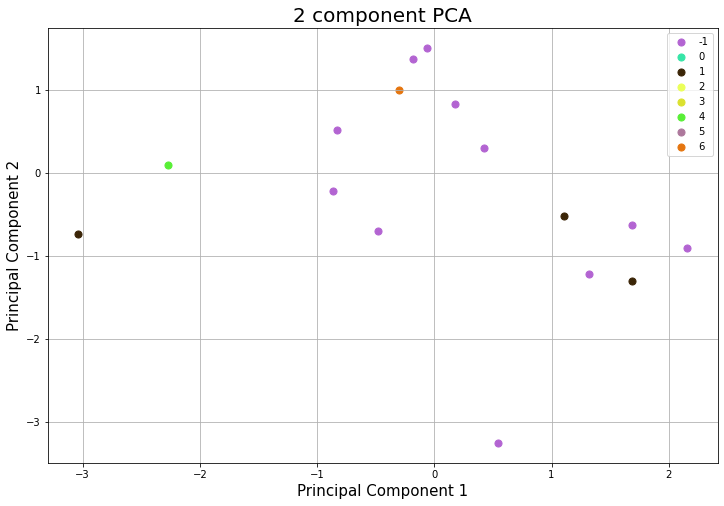

In [5]:
from random import randint
colors = []
n = 50
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = numpy.unique(df[['HighDay']])
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['HighDay'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Text(0.5, 1.0, 'Cumulative Variance Explained by Principal Components')

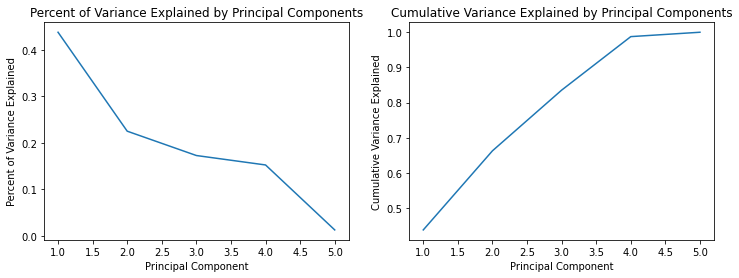

In [6]:
t = numpy.linspace(1,5, 5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

EVC = numpy.cumsum(pca.explained_variance_ratio_)

ax1.plot(t, pca.explained_variance_ratio_)
ax1.set(xlabel = ('Principal Component'), ylabel = ('Percent of Variance Explained'))
ax1.set_title('Percent of Variance Explained by Principal Components')
ax2.plot(t, EVC)
ax2.set(xlabel = ('Principal Component'), ylabel = ('Cumulative Variance Explained'))
ax2.set_title('Cumulative Variance Explained by Principal Components')

In [8]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 7447
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  349 non-null    float64
 1   principal component 2  349 non-null    float64
 2   principal component 3  349 non-null    float64
 3   principal component 4  349 non-null    float64
 4   principal component 5  349 non-null    float64
 5   HighDay                349 non-null    float64
dtypes: float64(6)
memory usage: 37.3 KB
